# Project 3 - Choose Your Own Adventure

Riley Galante

In [1]:
# basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#fashion mnist dataset is already available in keras, easier to extract this way
from tensorflow.keras.datasets import fashion_mnist

housing = pd.read_csv("archive-3/WakeCountyHousing.csv")
((train_X, train_y), (test_X, test_y)) = fashion_mnist.load_data()

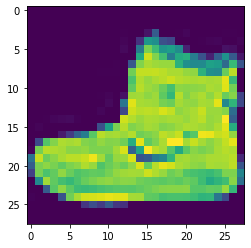

In [3]:
plt.imshow(train_X[0])

In [4]:
#check for missing data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308292 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      308292 non-null  int64  
 1   Deeded_Acreage      308292 non-null  float64
 2   Total_Sale_Price    308292 non-null  int64  
 3   Total_Sale_Date     308292 non-null  object 
 4   Month_Year_of_Sale  308292 non-null  object 
 5   Year_of_Sale        308292 non-null  int64  
 6   Year_Built          308292 non-null  int64  
 7   Year_Remodeled      308292 non-null  int64  
 8   Heated_Area         308292 non-null  int64  
 9   Num_Stories         308292 non-null  object 
 10  Design_Style        308292 non-null  object 
 11  Bath                308275 non-null  object 
 12  Utilities           306324 non-null  object 
 13  Physical_City       308183 non-null  object 
 14  Physical_Zip        308146 non-null  float64
dtypes: float64(2), int64(6), object(7)

In [5]:
#before any alterations are made to the data, separate housing data set 
#into training and testing set

#not really required but prevents data leaks and biases by only altering training set

from sklearn.model_selection import train_test_split

#separate dataset into predictor data and target data
house_target = housing.Total_Sale_Price
house_data = housing.loc[:, housing.columns != 'Total_Sale_Price'] #X

house_target = house_target.to_numpy()
house_data = house_data.to_numpy()

house_train_X, house_test_X, house_train_y, house_test_y = train_test_split(
    house_data, house_target, test_size = 0.3, random_state=None)

print(house_train_X.shape, house_test_X.shape)
print(house_train_y.shape, house_test_y.shape)



(215804, 14) (92488, 14)
(215804,) (92488,)


In [6]:
#recombine x train and y train into one dataframe

house_train_y = house_train_y.reshape(-1,1)
train = np.concatenate((house_train_X, house_train_y), axis=1)
housing = pd.DataFrame(train, columns=['Real_Estate_Id', 'Deeded_Acreage', 'Total_Sale_Date',
'Month_Year_of_Sale', 'Year_of_Sale', 'Year_Built', 'Year_Remodeled', 'Heated Area', 'Num_Stories',
'Design_Style', 'Bath', 'Utilities', 'Physical_City', 'Physical_Zip', 'Total_Sale_Price'])
housing.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip,Total_Sale_Price
0,3173,0.28,12/22/2015,December 2015,2015,2015,2015,3682,One Story,Conventional,3½ Bath,ALL,Apex,27502.0,600000
1,467967,0.26,11/23/2020,November 2020,2020,2020,2020,2601,Other,Conventional,3 Bath,ALL,Rolesville,27571.0,414000
2,276232,0.0,1/5/2012,January 2012,2012,2000,2000,1391,One Story,Condo,3½ Bath,ALL,Raleigh,27603.0,100000
3,23423,0.35,10/12/1992,October 1992,1992,1959,1959,1578,One Story,Ranch,1 ½ Bath,ALL,Cary,27511.0,85000
4,466195,0.44,11/5/2019,November 2019,2019,2019,2019,2907,Other,Conventional,3 Bath,E,Holly Springs,27540.0,430000


In [7]:
#lots of categorical variables in this dataset, bath, utilites, physical_city, and physical_zip
#all have missing values
#instead of deleting, inpute the most common occuring value for each of those categories

nan_columns = housing.columns[housing.isnull().any()]

for feature in nan_columns:
    common_val = housing[feature].value_counts().idxmax()
    print("null values in "+feature+" column will be inputed with "+str(common_val))
    housing[feature].fillna(common_val, inplace=True)

if(len(housing.columns[housing.isnull().any()]) == 0):
    print("No more null values")

null values in Bath column will be inputed with 2½ Bath
null values in Utilities column will be inputed with ALL
null values in Physical_City column will be inputed with Raleigh
null values in Physical_Zip column will be inputed with 27587.0
No more null values


In [8]:
#there are lots of features in this dataset that are categorical. These are the features
#that have an object datatype in the housing.info() above. They need to be encoded in a way
#the model can understand

#change total_sale_date strings into datetime
housing.Total_Sale_Date = pd.to_datetime(housing.Total_Sale_Date)

#month_year_of_sale is redundant information since we already have the datetime of the sale
#so it can be removed
del housing['Month_Year_of_Sale']

housing.head(10)

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Date,Year_of_Sale,Year_Built,Year_Remodeled,Heated Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip,Total_Sale_Price
0,3173,0.28,2015-12-22,2015,2015,2015,3682,One Story,Conventional,3½ Bath,ALL,Apex,27502.0,600000
1,467967,0.26,2020-11-23,2020,2020,2020,2601,Other,Conventional,3 Bath,ALL,Rolesville,27571.0,414000
2,276232,0.0,2012-01-05,2012,2000,2000,1391,One Story,Condo,3½ Bath,ALL,Raleigh,27603.0,100000
3,23423,0.35,1992-10-12,1992,1959,1959,1578,One Story,Ranch,1 ½ Bath,ALL,Cary,27511.0,85000
4,466195,0.44,2019-11-05,2019,2019,2019,2907,Other,Conventional,3 Bath,E,Holly Springs,27540.0,430000
5,343845,0.17,2013-10-10,2013,2007,2007,3304,Other,Conventional,2½ Bath,E,Raleigh,27616.0,309500
6,2704,0.73,2004-05-07,2004,1958,1958,864,One Story,Conventional,1 Bath,E,Raleigh,27610.0,40000
7,234356,0.59,2005-06-07,2005,1997,1997,3008,Other,Conventional,3 Bath,ALL,Wake Forest,27587.0,344000
8,107147,1.03,2019-01-23,2019,1986,1986,2983,Other,Conventional,3 Bath,E,Raleigh,27603.0,295000
9,66920,0.36,1998-11-16,1998,1971,1971,2418,One Story,Split level,3 Bath,ALL,Raleigh,27615.0,140000


In [9]:
#looking at the remaining categorical variables, a ranking system could potentially be generated
#for the bath and number of stories features, because generally a house with more of each
#will be more expensive
#thus, bath and number of stories will be ordinally encoded

#mapping strategy of ordinal encoding using category encoders was gathered from:
#https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c
from category_encoders import OrdinalEncoder

#specify the ranking order for encoder. per documentation, other typically meant limited,
#adequate, or no plumbing at all, which I deemed would be ranked below having 1 functional bath
maplist = [{'col': 'Bath', 'mapping': {'Other': 0, '1 Bath': 1,'1 ½ Bath': 2,
 '2 Bath': 3, '2½ Bath': 4,'3 Bath': 5, '3½ Bath': 6}}]

enc = OrdinalEncoder(mapping=maplist)
housing = enc.fit_transform(housing)

#per documentation, other typically mean 3 or multi story houses, which rank above two stories
maplist = [{'col': 'Num_Stories', 'mapping': {'One Story': 0, 'Two Story': 1,'Other': 2}}]
enc = OrdinalEncoder(mapping=maplist)
housing = enc.fit_transform(housing)

None

In [10]:
housing[['Bath', 'Num_Stories']].head(10)


,Bath,Num_Stories
0,6,0
1,5,2
2,6,0
3,2,0
4,5,2
5,4,2
6,1,0
7,5,2
8,5,2
9,5,0


In [11]:
#Design_style, utilities, physical city are the remaining categorical variables
#these will be one hot encoded because they are nominal
#get_dummies is a way to one hot encode using pandas

#features to one hot encode
features_enc = ['Design_Style', 'Utilities', 'Physical_City']

#makes dataframe of the one hot encoded variables, concatenated together columnwise
one_hot_housing = pd.concat([pd.get_dummies(housing[col],prefix=col) for col in features_enc], axis=1)

#concatenate one hot encoded variables to housing dataframe
housing = pd.concat([housing, one_hot_housing], axis=1)

#remove columns that have been one hot encoded
del housing['Design_Style']
del housing['Utilities']
del housing['Physical_City']

housing.head(10)

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Date,Year_of_Sale,Year_Built,Year_Remodeled,Heated Area,Num_Stories,Bath,Physical_Zip,...,Physical_City_Knightdale,Physical_City_Morrisville,Physical_City_New Hill,Physical_City_Raleigh,Physical_City_Rolesville,Physical_City_Wake Forest,Physical_City_Wendell,Physical_City_Willow Spring,Physical_City_Youngsville,Physical_City_Zebulon
0,3173,0.28,2015-12-22,2015,2015,2015,3682,0,6,27502.0,...,0,0,0,0,0,0,0,0,0,0
1,467967,0.26,2020-11-23,2020,2020,2020,2601,2,5,27571.0,...,0,0,0,0,1,0,0,0,0,0
2,276232,0.0,2012-01-05,2012,2000,2000,1391,0,6,27603.0,...,0,0,0,1,0,0,0,0,0,0
3,23423,0.35,1992-10-12,1992,1959,1959,1578,0,2,27511.0,...,0,0,0,0,0,0,0,0,0,0
4,466195,0.44,2019-11-05,2019,2019,2019,2907,2,5,27540.0,...,0,0,0,0,0,0,0,0,0,0
5,343845,0.17,2013-10-10,2013,2007,2007,3304,2,4,27616.0,...,0,0,0,1,0,0,0,0,0,0
6,2704,0.73,2004-05-07,2004,1958,1958,864,0,1,27610.0,...,0,0,0,1,0,0,0,0,0,0
7,234356,0.59,2005-06-07,2005,1997,1997,3008,2,5,27587.0,...,0,0,0,0,0,1,0,0,0,0
8,107147,1.03,2019-01-23,2019,1986,1986,2983,2,5,27603.0,...,0,0,0,1,0,0,0,0,0,0
9,66920,0.36,1998-11-16,1998,1971,1971,2418,0,5,27615.0,...,0,0,0,1,0,0,0,0,0,0


In [12]:
#zipcode is represented as a float, even as an int, the information is not
#particularly useful, since it is represented in one hot encoding by the physical city
#thus, zip code is redundant information and can be removed for cleanliness sake

del housing['Physical_Zip']

In [13]:
#for custom transformer, year built and year remodeled can be combined together into
#year last altered. while it matters when the house was built, its more important when
#the house was last remodeled, since the year remodeled column just includes year built
#if the house has not been remodeled, combining the two columns into one makes sense

from sklearn.base import BaseEstimator, TransformerMixin

class CombineAttributes(BaseEstimator, TransformerMixin):
    
    def __init__(self, year_last_alter):
        self.year_last_alter = year_last_alter

    def fit(self, X, y=None):
        return self

    #in this case, X is going to be a pandas df (housing), so its ok to assume
    #X is a dataframe
    #will go ahead and return modified dataframe
    def transform(self, X):
        for _, row in X.iterrows():
            if row['Year_Built'] == row['Year_Remodeled']:
                self.year_last_alter.append(row['Year_Built'])
            else:
                self.year_last_alter.append(row['Year_Remodeled'])
        
        new_df = pd.DataFrame(self.year_last_alter, columns=['Year_Last_Altered'])
        new_df = pd.concat([X, new_df], axis=1)

        #remove year built and year remodeled from new df since its been combined
        del new_df['Year_Built']
        del new_df['Year_Remodeled']

        return new_df


transformer = CombineAttributes(year_last_alter=[])
new_housing = transformer.transform(housing)
new_housing.head(35)



,Real_Estate_Id,Deeded_Acreage,Total_Sale_Date,Year_of_Sale,Heated Area,Num_Stories,Bath,Total_Sale_Price,Design_Style_Cape,Design_Style_Colonial,...,Physical_City_Morrisville,Physical_City_New Hill,Physical_City_Raleigh,Physical_City_Rolesville,Physical_City_Wake Forest,Physical_City_Wendell,Physical_City_Willow Spring,Physical_City_Youngsville,Physical_City_Zebulon,Year_Last_Altered
0,3173,0.28,2015-12-22,2015,3682,0,6,600000,0,0,...,0,0,0,0,0,0,0,0,0,2015
1,467967,0.26,2020-11-23,2020,2601,2,5,414000,0,0,...,0,0,0,1,0,0,0,0,0,2020
2,276232,0.0,2012-01-05,2012,1391,0,6,100000,0,0,...,0,0,1,0,0,0,0,0,0,2000
3,23423,0.35,1992-10-12,1992,1578,0,2,85000,0,0,...,0,0,0,0,0,0,0,0,0,1959
4,466195,0.44,2019-11-05,2019,2907,2,5,430000,0,0,...,0,0,0,0,0,0,0,0,0,2019
5,343845,0.17,2013-10-10,2013,3304,2,4,309500,0,0,...,0,0,1,0,0,0,0,0,0,2007
6,2704,0.73,2004-05-07,2004,864,0,1,40000,0,0,...,0,0,1,0,0,0,0,0,0,1958
7,234356,0.59,2005-06-07,2005,3008,2,5,344000,0,0,...,0,0,0,0,1,0,0,0,0,1997
8,107147,1.03,2019-01-23,2019,2983,2,5,295000,0,0,...,0,0,1,0,0,0,0,0,0,1986
9,66920,0.36,1998-11-16,1998,2418,0,5,140000,0,0,...,0,0,1,0,0,0,0,0,0,1971


In [14]:
#use standard scaler for standardization on housing dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#do not need to standardize target
housing_X = new_housing.drop('Total_Sale_Price', axis=1)

#omit total sale date because it is a datetime and cannot be scaled. year of sale is already
#in the dataset and should suffice as a subsitute
housing_scaled = scaler.fit_transform(housing_X.loc[:, housing_X.columns != 'Total_Sale_Date'])
housing_scaled = pd.DataFrame(housing_scaled, columns=[x for x in housing_X.columns if x!='Total_Sale_Date'])


In [15]:
housing_scaled.head()

,Real_Estate_Id,Deeded_Acreage,Year_of_Sale,Heated Area,Num_Stories,Bath,Design_Style_Cape,Design_Style_Colonial,Design_Style_Condo,Design_Style_Contemporary,...,Physical_City_Morrisville,Physical_City_New Hill,Physical_City_Raleigh,Physical_City_Rolesville,Physical_City_Wake Forest,Physical_City_Wendell,Physical_City_Willow Spring,Physical_City_Youngsville,Physical_City_Zebulon,Year_Last_Altered
0,-1.859067,-0.090961,0.515162,1.423213,-1.397366,1.424026,-0.005273,-0.008611,-0.201223,-0.044526,...,-0.153772,-0.056677,-0.936307,-0.092530,-0.26754,-0.136194,-0.088604,-0.021746,-0.116873,0.987236
1,1.721641,-0.102263,0.990342,0.336838,0.778473,0.752015,-0.005273,-0.008611,-0.201223,-0.044526,...,-0.153772,-0.056677,-0.936307,10.807263,-0.26754,-0.136194,-0.088604,-0.021746,-0.116873,1.244538
2,0.244542,-0.249193,0.230054,-0.879178,-1.397366,1.424026,-0.005273,-0.008611,4.969615,-0.044526,...,-0.153772,-0.056677,1.068026,-0.092530,-0.26754,-0.136194,-0.088604,-0.021746,-0.116873,0.215331
3,-1.703063,-0.051403,-1.670667,-0.691248,-1.397366,-1.264017,-0.005273,-0.008611,-0.201223,-0.044526,...,-0.153772,-0.056677,-0.936307,-0.092530,-0.26754,-0.136194,-0.088604,-0.021746,-0.116873,-1.894542
4,1.707990,-0.000542,0.895306,0.644359,0.778473,0.752015,-0.005273,-0.008611,-0.201223,-0.044526,...,-0.153772,-0.056677,-0.936307,-0.092530,-0.26754,-0.136194,-0.088604,-0.021746,-0.116873,1.193077


In [16]:
#Linear Regression on housing
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_scaled, new_housing.Total_Sale_Price)

LinearRegression()

In [17]:
from sklearn.metrics import explained_variance_score as ev_score

ev_score(new_housing.Total_Sale_Price, lin_reg.predict(housing_scaled))

0.6970569669553991

1.0 is best, so ~0.7 in explained variance score means that the linear regression model does not best model the data.

In [18]:
from sklearn.metrics import mean_squared_error as mse

mse(new_housing.Total_Sale_Price, lin_reg.predict(housing_scaled), squared=False)

104608.75666533415

Root mean squared error is large, so linear regression is not the best to model this data.

In [19]:
from sklearn.tree import DecisionTreeRegressor

tr_reg = DecisionTreeRegressor()
tr_reg.fit(housing_scaled, new_housing.Total_Sale_Price)

DecisionTreeRegressor()

In [20]:
ev_score(new_housing.Total_Sale_Price, tr_reg.predict(housing_scaled))

1.0

In [21]:
mse(new_housing.Total_Sale_Price, tr_reg.predict(housing_scaled), squared=False)

0.0

EV score and RMSE are perfect, most likely meaning an overfitting of data. This can be checked through k-fold cross validation

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tr_reg, housing_scaled, new_housing.Total_Sale_Price,
    scoring="neg_mean_squared_error", cv=10)
#root for RMSE, take negative of scores because cross_val expects utility function (to be maximized)
#instead of a cost function (to be minimized)
tree_scores = np.sqrt(-scores)
print("Mean: ", tree_scores.mean())
print("Standard Deviation: ", tree_scores.std())

Mean:  110422.91685207502
Standard Deviation:  4354.475201542664


Cross val using validation sets shows that this model actually does not perform well, and just overfits the training data given.

In [24]:
#since housing price does not necessarily have a linear correlation with the features,
#random forest regressor might the most effective regression to use

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(housing_scaled, new_housing.Total_Sale_Price)

RandomForestRegressor()

In [27]:
#test fit
print("EV Score: ", ev_score(new_housing.Total_Sale_Price, forest.predict(housing_scaled)))

cv_scores = cross_val_score(forest, housing_scaled, new_housing.Total_Sale_Price,
    scoring="neg_mean_squared_error", cv=3)
#root for RMSE, take negative of scores because cross_val expects utility function (to be maximized)
#instead of a cost function (to be minimized)
forest_scores = np.sqrt(-cv_scores)
print("Mean: ", forest_scores.mean())
print("Standard Deviation: ", forest_scores.std())

EV Score:  0.9758366572462188
Mean:  80848.15253308113
Standard Deviation:  2329.8288004926426


In [33]:
#this model appears to perform better than the linear and decision tree models
#use grid cv to tune hyperparameters

#adapted from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import GridSearchCV

bootstrap = [True, False]
n_estimators = [10, 20, 40]
max_depth = [40, 80, 100]
max_features = [2, 4, 6, 8, 10]
min_samples_leaf = [3, 4, 5]
min_samples_split = [6, 8, 10]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

forest_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=1)
forest_search.fit(housing_scaled, new_housing.Total_Sale_Price)
forest_search.best_params_

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


{'bootstrap': False,
 'max_depth': 40,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 40}

In [36]:
#test hypertuned fit
print("EV Score: ", ev_score(new_housing.Total_Sale_Price, forest_search.best_estimator_.predict(housing_scaled)))

cv_scores = cross_val_score(forest_search.best_estimator_, housing_scaled, new_housing.Total_Sale_Price,
    scoring="neg_mean_squared_error", cv=3)
#root for RMSE, take negative of scores because cross_val expects utility function (to be maximized)
#instead of a cost function (to be minimized)
forest_sr_scores = np.sqrt(-cv_scores)
print("Mean: ", forest_sr_scores.mean())
print("Standard Deviation: ", forest_sr_scores.std())

EV Score:  0.9249416477712082
Mean:  79222.14557528391
Standard Deviation:  1841.0759310790845


Using cross validation on the hypertuned model, the rmse and standard deviation are lower, which is good! The ev score did lower, but because it was not tested using cross val, it is not as indicative of the performance of the model

In [37]:
mse(house_test_y, forest_search.best_estimator_.predict(house_test_X), squared=False)

/Users/rgalante/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: '10/26/1992'

In [ ]:
#this is somewhere down here
from sklearn.model_selection import StratifiedKFold

#perform stratified k fold split on data to get training and test indices
skf = StratifiedKFold(n_splits=2, random_state=None, shuffle=False).split(house_data, house_target)
for train_index, test_index in skf:
    house_train_X, house_test_X = house_data[train_index], house_data[test_index]
    house_train_y, house_test_y = house_target[train_index], house_target[test_index]

house_train_X.shape